In [1]:
import os
import shutil
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# from matplotlib_venn import venn2,venn2_circles
import scipy

import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import umap

## 制作独热版药物靶点与通路信息

In [41]:
df = pd.read_excel("药物靶点信息（最新）(4).xlsx")

In [42]:
cols = []
for i in range(2):
    cols.extend(list(df[f'target{i}']))

cols = list(set(cols))

In [43]:
while np.nan in cols:
    cols.remove(np.nan)

In [44]:
for col in cols:
    df[col] = np.nan
    for i in range(df.shape[0]):
        if col in list(df.iloc[i, 1:5]):
            df[col][i] = 1
        else:
            df[col][i] = 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_11584\2446160539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_11584\2446160539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_11584\2446160539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_11584\244616053

In [45]:
drop_cols = [f"target{i}" for i in range(6)]
df.drop(columns=drop_cols, inplace=True)

In [46]:
df.to_excel('药物靶点信息独热版（最新）(4).xlsx', index=False)

In [48]:
df2 = pd.read_excel('药物通路信息.xlsx')

In [49]:
pathways = []
for pathway in df2['Pathway']:
    t = str(pathway).split(";")
    t = [i.strip() for i in t]
    if len(t) < 8:
        for i in range(8-len(t)):
            t.append("")
    pathways.append(t)

In [47]:
pnum = []
for pw in df2['Pathway']:
    t = str(pw).split(";")
    pnum.append(len(t))

max(pnum)

8

In [50]:
for i in range(8):
    df2[f'pathway{i}'] = [pw[i] for pw in pathways]

In [51]:
df2.head()

,drug_name,Pathway,pathway0,pathway1,pathway2,pathway3,pathway4,pathway5,pathway6,pathway7
0,Leelamine,GPCR/G Protein; Metabolic Enzyme/Protease; Neu...,GPCR/G Protein,Metabolic Enzyme/Protease,Neuronal Signaling,,,,,
1,Mefloquine (hydrochloride),Anti-infection; Autophagy; Immunology/Inflamma...,Anti-infection,Autophagy,Immunology/Inflammation,Membrane Transporter/Ion Channel,Metabolic Enzyme/Protease,NF-κB,,
2,TPEN,Apoptosis; Autophagy; Immunology/Inflammation;...,Apoptosis,Autophagy,Immunology/Inflammation,Metabolic Enzyme/Protease,NF-κB,,,
3,Butylhydroxyanisole,Apoptosis; Immunology/Inflammation; Metabolic ...,Apoptosis,Immunology/Inflammation,Metabolic Enzyme/Protease,NF-κB,,,,
4,MAO-IN-M30 (dihydrochloride),Neuronal Signaling,Neuronal Signaling,,,,,,,


In [53]:
cols = []
for i in range(8):
    cols.extend(list(df2[f'pathway{i}']))

cols = list(set(cols))
cols.remove("")
cols.remove('0')
cols

['Protein Tyrosine Kinase/RTK',
 'NF-κB',
 'Autophagy',
 'Apoptosis',
 'Neuronal Signaling',
 'Stem Cell/Wnt',
 'Cytoskeleton',
 'Epigenetics',
 'Anti-infection',
 'Antibody-drug Conjugate/ADC Related',
 'Others',
 'MAPK/ERK Pathway',
 'TGF-beta/Smad',
 'PI3K/Akt/mTOR',
 'Immunology/Inflammation',
 'GPCR/G Protein',
 'PROTAC',
 'Metabolic Enzyme/Protease',
 'Cell Cycle/DNA Damage',
 'Membrane Transporter/Ion Channel',
 'JAK/STAT Signaling']

In [55]:
for col in cols:
    df2[col] = np.nan
    for i in range(df2.shape[0]):
        if col in list(df2.iloc[i,2:10]):
            df2[col][i] = 1
        else:
            df2[col][i] = 0

C:\Users\DELL\AppData\Local\Temp\ipykernel_21840\4155019304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][i] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_21840\4155019304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][i] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_21840\4155019304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][i] = 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_21840\415501

In [58]:
drop_cols = ['Pathway'] + [f'pathway{i}' for i in range(8)]
df2.drop(columns=drop_cols, inplace=True)

In [59]:
df2.to_excel("药物通路信息独热版.xlsx")

## 按图像

In [33]:
df = pd.read_csv("angii_drug_image_predict.csv")

In [34]:
df.head()

,filename,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v1275,v1276,v1277,v1278,v1279,output0,output1,prob0,prob1,class
0,090401_r04c07f11p17-crop13.tiff,0.020333,0.291839,0.103951,-0.087743,-0.119773,0.021885,-0.132977,0.016322,0.692921,...,0.099899,0.139259,0.252044,-0.145904,0.000959,-4.811029,4.728105,0.000072,0.999928,1
1,062701_r06c04f01p17-crop02.tiff,0.307712,0.037526,-0.073381,0.043645,-0.115372,0.326860,0.279665,-0.069357,-0.134457,...,0.019790,-0.058772,0.013777,0.103338,0.017410,-1.395581,1.301022,0.063174,0.936826,1
2,071101_r04c04f07p17-crop29.tiff,0.032383,-0.147943,0.391514,-0.098216,-0.065049,0.337298,-0.166562,-0.015872,-0.107402,...,0.098443,-0.093827,-0.121760,0.119437,-0.038967,2.329145,-2.284943,0.990186,0.009814,0
3,070501_r04c11f10p17-crop07.tiff,-0.058602,-0.069408,-0.015524,-0.049506,-0.106046,0.459493,-0.099455,0.131444,-0.129220,...,-0.106705,-0.089511,-0.150781,0.372088,0.102936,4.739146,-4.824048,0.999930,0.000070,0
4,070201_r04c10f06p17-crop09.tiff,0.225906,-0.040588,0.395790,0.062167,-0.019522,0.364218,-0.043056,0.036722,-0.115458,...,0.067795,-0.037798,-0.179435,-0.116355,-0.031487,4.166558,-4.186358,0.999764,0.000236,0


In [39]:
df['image'] = df.apply(lambda x:x['filename'][:16], axis=1)

In [41]:
df_image_agg = df.groupby('image').mean()

In [45]:
df_image_agg.reset_index(inplace=True)
df_image_agg['location'] = df_image_agg.apply(lambda x:x['image'][:13], axis=1)
df_image_agg.head()

,image,v0,v1,v2,v3,v4,v5,v6,v7,v8,...,v1276,v1277,v1278,v1279,output0,output1,prob0,prob1,class,location
0,061901_r02c04f01,0.205125,-0.019503,-0.085377,0.174812,0.114189,-0.069715,0.156646,-0.116907,-0.005520,...,-0.128566,0.128852,0.068960,-0.096883,-1.869922,1.793096,0.490077,0.509923,0.500000,061901_r02c04
1,061901_r02c04f02,0.009480,-0.047930,-0.089475,0.038346,0.177964,-0.071717,0.135994,0.342370,-0.116885,...,-0.084691,-0.080734,0.153456,-0.024461,2.572207,-2.557707,0.681792,0.318208,0.333333,061901_r02c04
2,061901_r02c04f03,0.914234,0.406927,-0.059902,0.209386,-0.056175,-0.073344,0.277427,0.150224,0.425817,...,0.209923,0.593413,0.010285,-0.051474,-9.733390,9.522011,0.235629,0.764371,0.750000,061901_r02c04
3,061901_r02c04f04,0.226065,0.020500,0.104627,0.013300,0.411614,-0.061985,0.120856,0.190379,-0.116285,...,-0.081859,-0.063496,0.277609,-0.053308,1.796133,-1.758463,0.778531,0.221469,0.285714,061901_r02c04
4,061901_r02c04f05,0.047347,-0.018993,-0.096037,0.042896,0.319307,-0.094062,0.145260,0.398076,-0.139590,...,-0.106023,0.034668,0.257893,-0.046131,2.339710,-2.308772,0.935410,0.064590,0.000000,061901_r02c04


In [47]:
df_drug_info = pd.read_csv('angii给药信息.csv', encoding='gb2312')

In [49]:
df_drug_info = df_drug_info[['location', 'drug_name']]

In [51]:
df_image_agg = df_image_agg.join(df_drug_info.set_index('location'), on='location')

In [52]:
df_image_agg.to_csv('angii_drug_predict_image_agg.csv', encoding='gb2312')

## 画图

In [64]:
df1 = pd.read_csv("angii_drug_predict_drug_agg(gb2312)(2).csv", encoding='gb2312')
df2 = pd.read_excel("药物靶点信息独热版.xlsx")
df3 = pd.read_excel("药物通路信息独热版.xlsx")

In [23]:
targets = list(df2.columns[2:])
targets

['Isocitrate Dehydrogenase (IDH)',
 'AUTACs',
 'mTOR',
 'Histone Acetyltransferase',
 'Bcl-2 Family',
 'Adrenergic Receptor',
 'Calcium Channel',
 'Epigenetic Reader Domain',
 'NOD-like Receptor (NLR)',
 'Estrogen Receptor/ERR',
 '5-HT Receptor',
 'VEGFR',
 'Histone Demethylase',
 'E1/E2/E3 Enzyme',
 'Beta-secretase',
 'RAR/RXR',
 'Imidazoline Receptor',
 'STAT',
 'Reactive Oxygen Species',
 'Fungal',
 'IFNAR',
 'Glucocorticoid Receptor',
 'Microtubule/Tubulin',
 'Sodium Channel',
 'Cytochrome P450',
 'ATP Synthase',
 'PARP',
 'GABA Receptor',
 'FGFR',
 'IKK',
 'MDM-2/p53',
 'MEK',
 'Notch',
 'Interleukin Related',
 'Influenza Virus',
 'NF-κB',
 'Dynamin',
 'Phosphatase',
 'Filovirus',
 'Cannabinoid Receptor',
 'Keap1-Nrf2',
 'CRISPR/Cas9',
 'ROR',
 'Wnt',
 'Guanylate Cyclase',
 'DNA/RNA Synthesis',
 'Angiotensin-converting Enzyme (ACE)',
 'YAP',
 'p38 MAPK',
 'Melatonin Receptor',
 'STING',
 'TRP Channel',
 'Virus Protease',
 'Parasite',
 'FAAH',
 'HIV',
 'Endogenous Metabolite',
 'HB

In [67]:
pathways = list(df3.columns[2:])
pathways

['Protein Tyrosine Kinase/RTK',
 'NF-κB',
 'Autophagy',
 'Apoptosis',
 'Neuronal Signaling',
 'Stem Cell/Wnt',
 'Cytoskeleton',
 'Epigenetics',
 'Anti-infection',
 'Antibody-drug Conjugate/ADC Related',
 'Others',
 'MAPK/ERK Pathway',
 'TGF-beta/Smad',
 'PI3K/Akt/mTOR',
 'Immunology/Inflammation',
 'GPCR/G Protein',
 'PROTAC',
 'Metabolic Enzyme/Protease',
 'Cell Cycle/DNA Damage',
 'Membrane Transporter/Ion Channel',
 'JAK/STAT Signaling']

### 绘制output散点图

In [27]:
colors = ['gray', 'red']
for target in targets:
    df3 = pd.DataFrame({
    "output0": df1['output0'],
    "output1": df1['output1'],
    target: df2[target]
    })

    labels = ['Others', target]
    plt.figure()
    for i in range(2):
        plt.scatter(df3.loc[df3[target]==i, 'output0'],
                df3.loc[df3[target]==i, 'output1'],
                s=9,
                c=colors[i],
                label=labels[i]
                )

    plt.title(f'Model Output of Target {target}') 
    plt.xlabel('negative score')
    plt.xlabel('positive score')   
    plt.legend(loc='upper right')
    if "/" in target:
        target = target.replace("/", "_")
    plt.savefig(f'./output_scatterplots_targets/{target}.png', dpi=300)
    plt.close()

### 绘制TSNE散点图

In [45]:
select_cols = [f'v{i}' for i in range(1280)]
x = df1[select_cols].values

In [50]:
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [68]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", 2)
for target in targets:
    y = list(df2[target])
    if y.count(1) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        p = sns.scatterplot(x_embeded[:,0], x_embeded[:,1], hue=y1, hue_order=y1_order, legend='full', palette=palette)
        p.set_title(f"t-SNE (Target - {target})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./tsne_targets/{filename}.png", dpi=300)
        plt.close()

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c

In [69]:
# 通路信息tsne散点图
palette = sns.color_palette("bright", 2)
for pathway in pathways:
    y = list(df3[pathway])
    if y.count(1) > 2:
        y1 = [pathway if i==1 else 'Others' for i in y]
        y1_order = ['Others', pathway]
        p = sns.scatterplot(x_embeded[:,0], x_embeded[:,1], hue=y1, hue_order=y1_order, legend='full', palette=palette)
        p.set_title(f"t-SNE (Pathway - {pathway})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in pathway:
            filename = pathway.replace("/", "_")
        else:
            filename = pathway
        plot.savefig(f"./tsne_pathways/{filename}.png", dpi=300)
        plt.close()

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c

### 绘制UMAP散点图

In [72]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(x)

In [73]:
embedding.shape

(391, 2)

In [76]:
# 靶点信息umap散点图
palette = sns.color_palette("bright", 2)
for target in targets:
    y = list(df2[target])
    if y.count(1) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        p = sns.scatterplot(embedding[:,0], embedding[:,1], hue=y1, hue_order=y1_order, legend='full', palette=palette)
        p.set_title(f"UMAP (Target - {target})")
        p.set_xlabel('UMAP 0')
        p.set_ylabel('UMAP 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./umap_targets/{filename}.png", dpi=300)
        plt.close()

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c

In [77]:
# 通路信息umap散点图
palette = sns.color_palette("bright", 2)
for pathway in pathways:
    y = list(df3[pathway])
    if y.count(1) > 2:
        y1 = [pathway if i==1 else 'Others' for i in y]
        y1_order = ['Others', pathway]
        p = sns.scatterplot(embedding[:,0], embedding[:,1], hue=y1, hue_order=y1_order, legend='full', palette=palette)
        p.set_title(f"UMAP (Pathway - {pathway})")
        p.set_xlabel('UMAP 0')
        p.set_ylabel('UMAP 1')
        plot = p.get_figure()
        if "/" in pathway:
            filename = pathway.replace("/", "_")
        else:
            filename = pathway
        plot.savefig(f"./umap_pathways/{filename}.png", dpi=300)
        plt.close()

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c

## 绘图（location aggregate）

In [9]:
df1 = pd.read_csv("angii_drug_predict_location_agg(2).csv",encoding="gb2312")
df2 = pd.read_excel("药物靶点信息独热版.xlsx",index_col=0)
df3 = pd.read_excel("药物通路信息独热版.xlsx",index_col=0)

In [16]:
data_with_target = df1.join(df2.set_index('drug_name'), on='drug_name')
data_with_pathway = df1.join(df3.set_index('drug_name'), on='drug_name')

In [14]:
targets = list(df2.columns[1:])
pathways = list(df3.columns[1:])

### 绘制TSNE散点图

In [17]:
select_cols = [f'v{i}' for i in range(1280)]
x = df1[select_cols].values

In [18]:
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [32]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", len(targets))
for i,target in enumerate(targets):
    y = list(data_with_target[target])
    if y.count(1) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        colors = ['gray', palette[i]]
        p = sns.scatterplot(x_embeded[:,0], x_embeded[:,1], hue=y1, hue_order=y1_order, legend='full', palette=colors)
        p.set_title(f"t-SNE (Target - {target})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./tsne_targets_location_agg/{filename}.png", dpi=300)
        plt.close()

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

## 绘图（image aggregate）

### 绘制angii靶点图tsne

In [47]:
df1 = pd.read_csv("angii_drug_predict_image_agg.csv",encoding="gb2312")

In [48]:
# 筛选靶点药物
df4 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx")
drug_with_target = df4['drug_name'].to_list()
df1 = df1[df1["drug_name"].isin(drug_with_target)]

In [49]:
select_cols = [f'v{i}' for i in range(1280)]
x = df1[select_cols].values

In [50]:
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [51]:
output = pd.DataFrame(x_embeded,columns=['tsne1', 'tsne2'])
output['image'] = df1['image'].to_list()
output['drug_name'] = df1['drug_name'].to_list()
output.to_csv('靶点化合物tsne结果（angii）1009(4).csv', encoding='gb2312')

In [66]:
df1 = pd.read_csv("靶点化合物tsne结果（angii）1009(4).csv",encoding="gb2312")
df2 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx",index_col=0)
# df3 = pd.read_excel("药物通路信息独热版.xlsx",index_col=0)

In [67]:
data_with_target = df1.join(df2, on='drug_name')
# data_with_pathway = df1.join(df3.set_index('drug_name'), on='drug_name')

In [68]:
targets = list(df2.columns)
# pathways = list(df3.columns[1:])

In [69]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", 7)
for i,target in enumerate(targets):
    df_draw = data_with_target[['tsne1', 'tsne2', target]]
    df_draw = df_draw.sort_values(by=target, ascending=True)
    y = df_draw[target]
    if sum(y) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        colors = ['lightgray', palette[i%7]]
        sizes = {'Others': 3, target: 10}
        # 有标签：legend='full'
        p = sns.scatterplot(df_draw['tsne1'], df_draw['tsne2'], hue=y1, hue_order=y1_order, legend=False, palette=colors,size=y1,sizes=sizes)
        p.set_title(f"t-SNE (Target - {target})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./靶点药物tsne图（angii）1009(4)无标签/{filename}.png", dpi=300)
        plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

### 绘制iso靶点图tsne

In [56]:
df1 = pd.read_csv("iso_drug_predict_image_agg.csv",encoding="gb2312")

In [57]:
# 筛选靶点药物
df4 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx")
drug_with_target = df4['drug_name'].to_list()
df1 = df1[df1["drug_name"].isin(drug_with_target)]

In [58]:
select_cols = [f'v{i}' for i in range(1280)]
x = df1[select_cols].values

In [59]:
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [60]:
output = pd.DataFrame(x_embeded,columns=['tsne1', 'tsne2'])
output['image'] = df1['image'].to_list()
output['drug_name'] = df1['drug_name'].to_list()
output.to_csv('靶点化合物tsne结果（iso）1009(4).csv', encoding='gb2312')

In [61]:
df1 = pd.read_csv("靶点化合物tsne结果（iso）1009(4).csv",encoding="gb2312")
df2 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx",index_col=0)
# df3 = pd.read_excel("药物通路信息独热版.xlsx",index_col=0)

In [62]:
data_with_target = df1.join(df2, on='drug_name')
# data_with_pathway = df1.join(df3.set_index('drug_name'), on='drug_name')

In [63]:
targets = list(df2.columns)
# pathways = list(df3.columns[1:])

In [65]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", 7)
for i,target in enumerate(targets):
    df_draw = data_with_target[['tsne1', 'tsne2', target]]
    df_draw = df_draw.sort_values(by=target, ascending=True)
    y = df_draw[target]
    # if sum(y) > 2:
    y1 = [target if i==1 else 'Others' for i in y]
    y1_order = ['Others', target]
    colors = ['lightgray', palette[i%7]]
    sizes = {'Others': 3, target: 10}
    p = sns.scatterplot(df_draw['tsne1'], df_draw['tsne2'], hue=y1, hue_order=y1_order, legend=False, palette=colors,size=y1,sizes=sizes)
    p.set_title(f"t-SNE (Target - {target})")
    p.set_xlabel('t-SNE 0')
    p.set_ylabel('t-SNE 1')
    plot = p.get_figure()
    if "/" in target:
        filename = target.replace("/", "_")
    else:
        filename = target
    plot.savefig(f"./靶点药物tsne图（iso）1009(4)无标签/{filename}.png", dpi=300)
    plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

In [7]:
# # 靶点信息tsne散点图
# palette = sns.color_palette("bright", 7)
# for i,target in enumerate(targets):
#     y = list(data_with_target[target])
#     if y.count(1) > 2:
#         y1 = [target if i==1 else 'Others' for i in y]
#         y1_order = ['Others', target]
#         colors = ['lightgray', palette[i%7]]
#         sizes = {'Others': 3, target: 10}
#         p = sns.scatterplot(x_embeded[:,0], x_embeded[:,1], hue=y1, hue_order=y1_order, legend='full', palette=colors,size=y1,sizes=sizes)
#         p.set_title(f"t-SNE (Target - {target})")
#         p.set_xlabel('t-SNE 0')
#         p.set_ylabel('t-SNE 1')
#         plot = p.get_figure()
#         if "/" in target:
#             filename = target.replace("/", "_")
#         else:
#             filename = target
#         plot.savefig(f"./tsne_targets_image_agg/{filename}.png", dpi=300)
#         plt.close()
#     # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

In [81]:
# 通路信息tsne散点图
palette = sns.color_palette("bright", 7)
for i,pathway in enumerate(pathways):
    y = list(data_with_pathway[pathway])
    if y.count(1) > 2:
        y1 = [pathway if i==1 else 'Others' for i in y]
        y1_order = ['Others', pathway]
        colors = ['gray', palette[i%7]]
        p = sns.scatterplot(x_embeded[:,0], x_embeded[:,1], hue=y1, hue_order=y1_order, legend='full', palette=colors,s=3)
        p.set_title(f"t-SNE (Pathway - {pathway})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in pathway:
            filename = pathway.replace("/", "_")
        else:
            filename = pathway
        plot.savefig(f"./tsne_pathways_image_agg/{filename}.png", dpi=300)
        plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

In [80]:
pathways

['Protein Tyrosine Kinase/RTK',
 'NF-κB',
 'Autophagy',
 'Apoptosis',
 'Neuronal Signaling',
 'Stem Cell/Wnt',
 'Cytoskeleton',
 'Epigenetics',
 'Anti-infection',
 'Antibody-drug Conjugate/ADC Related',
 'Others',
 'MAPK/ERK Pathway',
 'TGF-beta/Smad',
 'PI3K/Akt/mTOR',
 'Immunology/Inflammation',
 'GPCR/G Protein',
 'PROTAC',
 'Metabolic Enzyme/Protease',
 'Cell Cycle/DNA Damage',
 'Membrane Transporter/Ion Channel',
 'JAK/STAT Signaling']

In [70]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(x)

In [71]:
# 靶点信息umap散点图
palette = sns.color_palette("bright", 7)
for i,target in enumerate(targets):
    y = list(data_with_target[target])
    if y.count(1) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        colors = ['gray', palette[i%7]]
        p = sns.scatterplot(x_embeded[:,0], x_embeded[:,1], hue=y1, hue_order=y1_order, legend='full', palette=colors,s=3)
        p.set_title(f"UMAP (Target - {target})")
        p.set_xlabel('UMAP 0')
        p.set_ylabel('UMAP 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./umap_targets_image_agg/{filename}.png", dpi=300)
        plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

# 绘图harmony

## 绘图harmony-angii

In [8]:
df = pd.read_excel('./对比-机器学习参数/angii_101靶点化合物harmony特征.xlsx',index_col=0)
x = df.values
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

output = pd.DataFrame(x_embeded,columns=['tsne1', 'tsne2'],index=df.index)
output.to_csv('./对比-机器学习参数/harmony靶点化合物tsne结果（angii）.csv', encoding='gb2312')

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [9]:
df1 = pd.read_csv('./对比-机器学习参数/harmony靶点化合物tsne结果（angii）.csv',encoding='gb2312')
df2 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx",index_col=0)

data_with_target = df1.join(df2, on='drug_name')
targets = list(df2.columns)

In [10]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", 7)
for i,target in enumerate(targets):
    df_draw = data_with_target[['tsne1', 'tsne2', target]]
    df_draw = df_draw.sort_values(by=target, ascending=True)
    y = df_draw[target]
    if sum(y) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        colors = ['lightgray', palette[i%7]]
        sizes = {'Others': 3, target: 10}
        # 有标签：legend='full'
        p = sns.scatterplot(df_draw['tsne1'], df_draw['tsne2'], hue=y1, hue_order=y1_order, legend=False, palette=colors,size=y1,sizes=sizes)
        p.set_title(f"t-SNE (Target - {target})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./对比-机器学习参数/harmony靶点药物tsne图（angii）/{filename}.png", dpi=300)
        plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

## 绘图harmony-iso

In [11]:
df = pd.read_excel('./对比-机器学习参数/iso_101靶点化合物harmony特征.xlsx',index_col=0)
x = df.values
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

output = pd.DataFrame(x_embeded,columns=['tsne1', 'tsne2'],index=df.index)
output.to_csv('./对比-机器学习参数/harmony靶点化合物tsne结果（iso）.csv', encoding='gb2312')

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
df1 = pd.read_csv('./对比-机器学习参数/harmony靶点化合物tsne结果（iso）.csv',encoding='gb2312')
df2 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx",index_col=0)

data_with_target = df1.join(df2, on='drug_name')
targets = list(df2.columns)

In [13]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", 7)
for i,target in enumerate(targets):
    df_draw = data_with_target[['tsne1', 'tsne2', target]]
    df_draw = df_draw.sort_values(by=target, ascending=True)
    y = df_draw[target]
    if sum(y) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        colors = ['lightgray', palette[i%7]]
        sizes = {'Others': 3, target: 10}
        # 有标签：legend='full'
        p = sns.scatterplot(df_draw['tsne1'], df_draw['tsne2'], hue=y1, hue_order=y1_order, legend=False, palette=colors,size=y1,sizes=sizes)
        p.set_title(f"t-SNE (Target - {target})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./对比-机器学习参数/harmony靶点药物tsne图（iso）/{filename}.png", dpi=300)
        plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

# 绘图cellprofiler

## 绘图cellprofiler-angii

In [22]:
# 提取靶点化合物图像
df = pd.read_excel('./angii给药信息.xlsx',sheet_name="101靶点化合物")
location = df['location'].to_list()
for ch in range(1, 5):
    filenames = os.listdir(f"D:/jxb/image_data/angii_drug_image/whole_images/ch{ch}")
    wanted_images = [fn for fn in filenames if fn[:13] in location]
    for image in wanted_images:
        shutil.copyfile(f"D:/jxb/image_data/angii_drug_image/whole_images/ch{ch}/{image}",
                        f"D:/jxb/image_data/angii_drug_image/cellprofiler靶点化合物图像/ch{ch}/{image}")

In [2]:
df = pd.read_excel('./对比-机器学习参数/cellprofiler_靶点化合物feature_angii.xlsx',index_col=0)
x = df.values
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

output = pd.DataFrame(x_embeded,columns=['tsne1', 'tsne2'],index=df.index)
output.to_csv('./对比-机器学习参数/cellprofiler靶点化合物tsne结果（angii）.csv', encoding='gb2312')

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [3]:
df1 = pd.read_csv('./对比-机器学习参数/cellprofiler靶点化合物tsne结果（angii）.csv',encoding='gb2312')
df2 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx",index_col=0)

data_with_target = df1.join(df2, on='drug_name')
targets = list(df2.columns)

In [4]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", 7)
for i,target in enumerate(targets):
    df_draw = data_with_target[['tsne1', 'tsne2', target]]
    df_draw = df_draw.sort_values(by=target, ascending=True)
    y = df_draw[target]
    if sum(y) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        colors = ['lightgray', palette[i%7]]
        sizes = {'Others': 3, target: 10}
        # 有标签：legend='full'
        p = sns.scatterplot(df_draw['tsne1'], df_draw['tsne2'], hue=y1, hue_order=y1_order, legend=False, palette=colors,size=y1,sizes=sizes)
        p.set_title(f"t-SNE (Target - {target})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./对比-机器学习参数/cellprofiler靶点药物tsne图（angii）/{filename}.png", dpi=300)
        plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

## 绘图cellprofiler-iso

In [5]:
# 提取靶点化合物图像
df = pd.read_excel('./iso给药信息.xlsx',sheet_name="101靶点化合物信息")
location = df['location'].to_list()
for ch in range(1, 5):
    filenames = os.listdir(f"D:/jxb/image_data/iso_drug_image/whole_images/ch{ch}")
    wanted_images = [fn for fn in filenames if fn[:13] in location]
    for image in wanted_images:
        shutil.copyfile(f"D:/jxb/image_data/iso_drug_image/whole_images/ch{ch}/{image}",
                        f"D:/jxb/image_data/iso_drug_image/cellprofiler靶点化合物图像/ch{ch}/{image}")

In [7]:
df = pd.read_excel('./对比-机器学习参数/cellprofiler_靶点化合物feature_iso.xlsx',index_col=0)
x = df.values
tsne = TSNE()
x_embeded = tsne.fit_transform(x)

output = pd.DataFrame(x_embeded,columns=['tsne1', 'tsne2'],index=df.index)
output.to_csv('./对比-机器学习参数/cellprofiler靶点化合物tsne结果（iso）.csv', encoding='gb2312')

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [8]:
df1 = pd.read_csv('./对比-机器学习参数/cellprofiler靶点化合物tsne结果（iso）.csv',encoding='gb2312')
df2 = pd.read_excel("药物靶点信息独热版（最新）(4).xlsx",index_col=0)

data_with_target = df1.join(df2, on='drug_name')
targets = list(df2.columns)

In [9]:
# 靶点信息tsne散点图
palette = sns.color_palette("bright", 7)
for i,target in enumerate(targets):
    df_draw = data_with_target[['tsne1', 'tsne2', target]]
    df_draw = df_draw.sort_values(by=target, ascending=True)
    y = df_draw[target]
    if sum(y) > 2:
        y1 = [target if i==1 else 'Others' for i in y]
        y1_order = ['Others', target]
        colors = ['lightgray', palette[i%7]]
        sizes = {'Others': 3, target: 10}
        # 有标签：legend='full'
        p = sns.scatterplot(df_draw['tsne1'], df_draw['tsne2'], hue=y1, hue_order=y1_order, legend=False, palette=colors,size=y1,sizes=sizes)
        p.set_title(f"t-SNE (Target - {target})")
        p.set_xlabel('t-SNE 0')
        p.set_ylabel('t-SNE 1')
        plot = p.get_figure()
        if "/" in target:
            filename = target.replace("/", "_")
        else:
            filename = target
        plot.savefig(f"./对比-机器学习参数/cellprofiler靶点药物tsne图（iso）/{filename}.png", dpi=300)
        plt.close()
    # break

c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

## 筛选靶点信息处理

In [83]:
df_target = pd.read_excel('筛选靶点信息.xlsx')

In [85]:
df_target.head()

,target,Leelamine,Mefloquine (hydrochloride),TPEN,Butylhydroxyanisole,MAO-IN-M30 (dihydrochloride),Glucosamine,P62-mediated mitophagy inducer,"(R,S)-Ivosidenib",Tetrandrine,...,α-Lipoic Acid,Pargyline (hydrochloride),W-54011,Dexamethasone,Riboflavin Tetrabutyrate,Phillygenin,Uric acid,Asiaticoside,Bigelovin,Doxorubicin (hydrochloride)
0,Histone Acetyltransferase,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Epigenetic Reader Domain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,VEGFR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E1/E2/E3 Enzyme,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beta-secretase,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
dict = dict()
for target in df_target['target']:
    dict[target] = []

dict

{'Histone Acetyltransferase': [],
 'Epigenetic Reader Domain': [],
 'VEGFR': [],
 'E1/E2/E3 Enzyme': [],
 'Beta-secretase': [],
 'STAT': [],
 'Glucocorticoid Receptor': [],
 'Dynamin': [],
 'Wnt': [],
 'Guanylate Cyclase': [],
 'TRP Channel': [],
 'HBV': [],
 'HMG-CoA Reductase (HMGCR)': [],
 'PDGFR': [],
 'Amyloid-β': [],
 'Ribosomal S6 Kinase (RSK)': [],
 'Insulin Receptor': [],
 'SGLT': [],
 'β-catenin': [],
 'IRAK': [],
 'COMT': [],
 'Monocarboxylate Transporter': [],
 'Toll-like Receptor (TLR)': [],
 'Complement System': [],
 'Dopamine β-hydroxylase': [],
 'Chloride Channel': [],
 'Drug Metabolite': [],
 'PPAR': [],
 'Casein Kinase': [],
 'CFTR': [],
 'HIF/HIF Prolyl-Hydroxylase': [],
 'NADPH Oxidase': [],
 'Hexokinase': [],
 'TGF-beta/Smad': [],
 'Glutaminase': [],
 'LRRK2': [],
 'MyD88': [],
 'Opioid Receptor': [],
 'Reverse Transcriptase': [],
 'NO Synthase': [],
 'AChE': [],
 'IRE1': [],
 'Potassium Channel': [],
 'PI3K': [],
 'JAK': []}

In [88]:
drugs = list(df_target.columns)[1:]
drugs

['Leelamine',
 'Mefloquine (hydrochloride)',
 'TPEN',
 'Butylhydroxyanisole',
 'MAO-IN-M30 (dihydrochloride)',
 'Glucosamine',
 'P62-mediated mitophagy inducer',
 '(R,S)-Ivosidenib',
 'Tetrandrine',
 'Sunitinib',
 'Cichoric Acid',
 'Zofenopril (calcium)',
 'Mitoquinone (mesylate)',
 '3-Demethylcolchicine',
 'Protopine',
 'Rifamycin S',
 'D-(+)-Glucono-1,5-lactone',
 'Thiabendazole',
 'Tricarballylic acid',
 'Isoquercitrin',
 'PK11007',
 '5-Aminolevulinic acid (hydrochloride)',
 'Liquiritin',
 "3'-Hydroxypuerarin",
 'AICAR (phosphate)',
 '3,5-Di-tert-butylphenol',
 'Hydroxyamine (hydrochloride)',
 'L-2-Hydroxyglutaric acid (disodium)',
 '1,3-Dicaffeoylquinic acid',
 '3,4-Dimethoxycinnamic acid',
 'BI-6C9',
 'Adezmapimod',
 '(E)-3,4-Dimethoxycinnamic acid',
 'Nerol',
 'Rotenone',
 'Ethyl ferulate',
 'Modaline (sulfate)',
 'IDH889',
 'Tanespimycin',
 'Ruxolitinib',
 '4-Hydroxyderricin',
 'Ruxolitinib (phosphate)',
 'Pitavastatin (Calcium)',
 'Vidofludimus',
 'Safinamide (mesylate)',
 'Glu

In [94]:
df_target.set_index('target', inplace=True)
for target in df_target.index:
    for drug in drugs:
        if df_target.at[target, drug] == 1:
            dict[target].append(drug)


In [95]:
dict

{'Histone Acetyltransferase': ['Curcumin'],
 'Epigenetic Reader Domain': ['Curcumin'],
 'VEGFR': ['Sunitinib', 'PTC299'],
 'E1/E2/E3 Enzyme': ['BC1618'],
 'Beta-secretase': ['Epiberberine (chloride)'],
 'STAT': ['Garcinone D'],
 'Glucocorticoid Receptor': ['Dexamethasone acetate', 'Dexamethasone'],
 'Dynamin': ['Mdivi-1', 'Schaftoside'],
 'Wnt': ['Salinomycin', 'Echinacoside', 'Methyl vanillate'],
 'Guanylate Cyclase': ['Methylene blue (trihydrate)'],
 'TRP Channel': ['Diphenyleneiodonium chloride'],
 'HBV': ['Isochlorogenic acid A', 'Doxorubicin (hydrochloride)'],
 'HMG-CoA Reductase (HMGCR)': ['Pitavastatin (Calcium)'],
 'PDGFR': ['Sunitinib'],
 'Amyloid-β': ['Deferoxamine (mesylate)'],
 'Ribosomal S6 Kinase (RSK)': ['Quercitrin'],
 'Insulin Receptor': ['MSDC 0160'],
 'SGLT': ['Tofogliflozin (hydrate)'],
 'β-catenin': ['Salinomycin'],
 'IRAK': ['Ginsenoside Rb1'],
 'COMT': ['Rosmarinic acid'],
 'Monocarboxylate Transporter': ['7ACC2'],
 'Toll-like Receptor (TLR)': ['Schaftoside'],
 '

In [96]:
import json
with open('drugs_of_selected_targets.json', 'w') as file:
    json.dump(dict, file)

In [29]:
df = pd.read_excel("./药物靶点信息独热版（去除105天然药物）.xlsx",index_col=0)
df.head()

,Isocitrate Dehydrogenase (IDH),AUTACs,mTOR,Histone Acetyltransferase,Bcl-2 Family,Adrenergic Receptor,Calcium Channel,Epigenetic Reader Domain,NOD-like Receptor (NLR),Estrogen Receptor/ERR,...,Opioid Receptor,Reverse Transcriptase,NO Synthase,COX,AChE,IRE1,Antibiotic,Potassium Channel,PI3K,JAK
drug_name,,,,,,,,,,,,,,,,,,,,,
Leelamine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mefloquine (hydrochloride),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TPEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Butylhydroxyanisole,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MAO-IN-M30 (dihydrochloride),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
one_drug_targets = []
for c in df.columns:
    if df[c].sum()==1:
        one_drug_targets.append(c)

one_drug_targets

['AUTACs',
 'Bcl-2 Family',
 'NOD-like Receptor (NLR)',
 'E1/E2/E3 Enzyme',
 'Imidazoline Receptor',
 'IFNAR',
 'Sodium Channel',
 'PARP',
 'FGFR',
 'MEK',
 'Notch',
 'NF-κB',
 'Dynamin',
 'Filovirus',
 'Cannabinoid Receptor',
 'Keap1-Nrf2',
 'CRISPR/Cas9',
 'Wnt',
 'Guanylate Cyclase',
 'Angiotensin-converting Enzyme (ACE)',
 'YAP',
 'Melatonin Receptor',
 'STING',
 'TRP Channel',
 'FAAH',
 'HBV',
 'HMG-CoA Reductase (HMGCR)',
 'PDGFR',
 'Amyloid-β',
 'P-glycoprotein',
 'Insulin Receptor',
 'DNA Alkylator/Crosslinker',
 'SGLT',
 'β-catenin',
 'HDAC',
 'ADC Cytotoxin',
 'Monocarboxylate Transporter',
 'Chloride Channel',
 'Casein Kinase',
 'CFTR',
 'Hexokinase',
 'TGF-beta/Smad',
 'LRRK2',
 'Lipoxygenase',
 'Reverse Transcriptase',
 'NO Synthase',
 'AChE',
 'IRE1']

In [31]:
# df.set_index(keys="drug_name", inplace=True)

one_target_drugs = []
for target in one_drug_targets:
    drug = df[df[target]==1].index[0]
    if df.loc[drug,:].sum()==1:
        one_target_drugs.append(drug)

In [32]:
df.drop(columns=one_drug_targets, inplace=True)

In [33]:
df.to_excel("./药物靶点信息独热版（去除天然药物+删除单药靶点）.xlsx")

# 化合物聚类

## 化合物聚类angii

In [71]:
wanted_drugs1 = ["Liquiritin","3'-Hydroxypuerarin","3,4-Dimethoxycinnamic acid","1,3-Dicaffeoylquinic acid","(E)-3,4-Dimethoxycinnamic acid",
                  "Ethyl ferulate","Nobiletin","Luteolin 5-O-glucoside","Quercitrin","Glucosamine (hydrochloride)"]
df = pd.read_excel("./药物靶点信息独热版（最新）(4).xlsx")
wanted_drugs2 = df['drug_name'].to_list()
wanted_drugs = list(set(wanted_drugs1 + wanted_drugs2))

In [72]:
df1 = pd.read_csv("angii_drug_predict_image_agg.csv",encoding="gb2312")
df1 = df1[df1["drug_name"].isin(wanted_drugs)]

In [74]:
df1 = df1.groupby("drug_name").mean()

In [119]:
df_drug = df1.loc[wanted_drugs1+wanted_drugs2]

In [135]:
df_drug1 = df1.loc[[wanted_drugs1[3],]+wanted_drugs2]

In [136]:
select_cols = [f'v{i}' for i in range(1280)]
x = df_drug1[select_cols].values

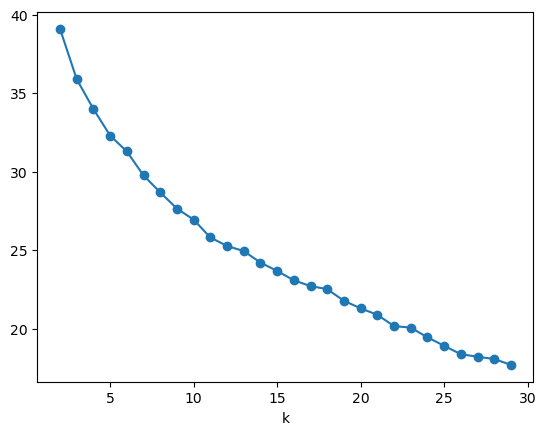

In [137]:
inertia = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2, 30), inertia, 'o-')
plt.xlabel('k')
plt.show()

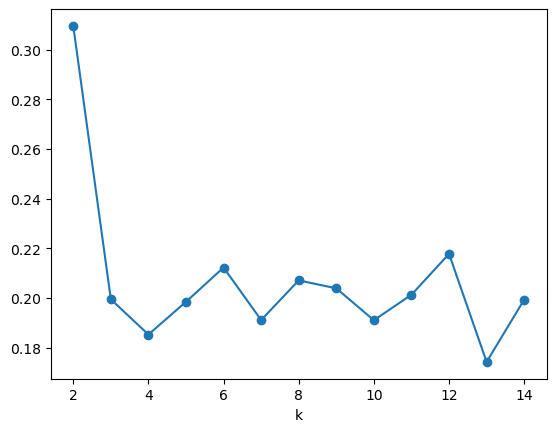

In [138]:
sil_score = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,random_state=0).fit(x)
    sil_score.append(silhouette_score(x,kmeans.labels_))
plt.plot(range(2,15),sil_score,'o-')
plt.xlabel('k')
plt.show()

In [139]:
n_clusters = 9

df_results = []
cluster_results = []
centroids = []
for i in range(10):
    df_kmeans = df1.loc[[wanted_drugs1[i],]+wanted_drugs2]
    select_cols = [f'v{i}' for i in range(1280)]
    x = df_kmeans[select_cols].values

    cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(x)
    y_pred = cluster.labels_#获取训练后对象的每个样本的标签
    df_kmeans['cluster'] = y_pred
    label = df_kmeans.loc[wanted_drugs1[i], 'cluster']
    similar_drugs = df_kmeans[df_kmeans['cluster']==label].index.to_list()

    df_results.append(df_kmeans)
    cluster_results.append(similar_drugs)
    # 每次聚类的9个簇心(9, 1280)
    centroids.append(cluster.cluster_centers_)

In [189]:
palette = sns.color_palette("muted", 9)
for i in range(10):
    df = df_results[i]
    centroid = centroids[i]

    cluster_label = df['cluster'].to_list()
    select_cols = [f'v{i}' for i in range(1280)]
    x_drug = df[select_cols].values

    x = np.append(x_drug, centroid, axis=0)
    x_embeded = TSNE().fit_transform(x)
    drug_label = df.loc[wanted_drugs1[i], 'cluster']
    label = cluster_label + ['centers' for i in range(9)]
    p = sns.scatterplot(x_embeded[:-9,0], x_embeded[:-9,1], hue=cluster_label, legend='full', palette=palette)
    plt.scatter(x_embeded[-9:,0], x_embeded[-9:,1], marker='*',c='red')
    p.legend(bbox_to_anchor=(1,-0.2), ncol=5)
    p.set_title(f'KMeans ({wanted_drugs1[i]} in cluster {int(drug_label)})')
    plot = p.get_figure()
    plot.savefig(f'./药物聚类图/kmeans降维图-{wanted_drugs1[i]}.png', dpi=300)
    plt.close()

c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files (x86)\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarnin

In [188]:
palette

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451)]

In [157]:
import csv

with open("kmeans聚类结果angii.csv", "a", encoding="gb2312", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(cluster_results)

## 化合物聚类iso

In [203]:
wanted_drugs1 = ["Tanshinone IIA","Isochlorogenic acid A","Ginsenoside Rb1","Resveratrol analog 1",
                 "Astragaloside II","Tetrandrine","hydroxysafflor yellow A","Danshensu",
                 "9''-Methyl salvianolate B","salvianolic acid B"]
df = pd.read_excel("./药物靶点信息独热版（最新）(4).xlsx")
wanted_drugs2 = df['drug_name'].to_list()
wanted_drugs2.remove('JX06')
wanted_drugs = list(set(wanted_drugs1 + wanted_drugs2))

In [204]:
df1 = pd.read_csv("iso_drug_predict_drug_agg.csv",encoding="gb2312",index_col='drug_name')
df1 = df1[df1.index.isin(wanted_drugs)]

In [205]:
df_drug = df1.loc[wanted_drugs1+wanted_drugs2]

In [206]:
select_cols = [f'v{i}' for i in range(1280)]
x = df_drug[select_cols].values

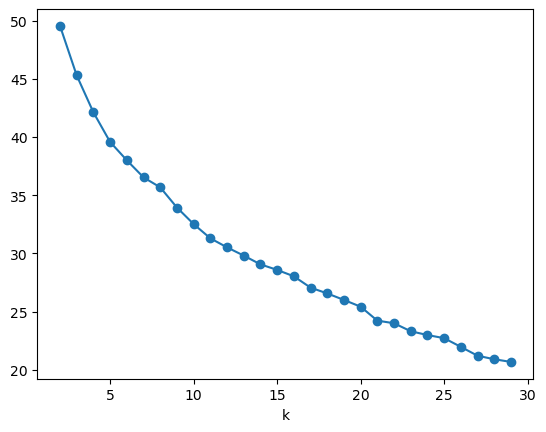

In [207]:
inertia = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2, 30), inertia, 'o-')
plt.xlabel('k')
plt.show()

In [209]:
n_clusters = 9

df_results2 = []
cluster_results2 = []
centroids2 = []
for i in range(10):
    df_kmeans = df1.loc[[wanted_drugs1[i],]+wanted_drugs2]
    select_cols = [f'v{i}' for i in range(1280)]
    x = df_kmeans[select_cols].values

    cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(x)
    y_pred = cluster.labels_#获取训练后对象的每个样本的标签
    df_kmeans['cluster'] = y_pred
    label = df_kmeans.loc[wanted_drugs1[i], 'cluster']
    similar_drugs = df_kmeans[df_kmeans['cluster']==label].index.to_list()

    df_results2.append(df_kmeans)
    cluster_results2.append(similar_drugs)
    # 每次聚类的9个簇心(9, 1280)
    centroids2.append(cluster.cluster_centers_)

In [ ]:
with open("kmeans聚类结果iso.csv", "a", encoding="gb2312", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(cluster_results2)